# <center>Non-negative least squares<center>

In this example, we fit a linear model with positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression

在这个例子中，我们拟合了一个对回归系数有正约束的线性模型，并将估计的系数与经典线性回归进行了比较

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score


np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
# 点乘积(即两个数组相同位置上的数分别进行乘积，然后对结果进行求和)
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


# Fit the Non-Negative least squares
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

# Fit an OLS
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

NNLS R2 score 0.8225220806196525
OLS R2 score 0.7436926291700343


from the example above, Comparing the regression coefficients between OLS and NNLS, we can observe they are highly correlated (the dashed line is the identity relation), but the non-negative constraint shrinks some to 0. The Non-Negative Least squares inherently yield sparse results

通过上面例子来看, 比较OLS和NNLS之间的回归系数，我们可以观察到它们高度相关(虚线表示恒等关系)，但非负约束使一些回归系数缩小为0。非负最小二乘本质上产生稀疏结果

Text(0, 0.5, 'NNLS regression coefficients')

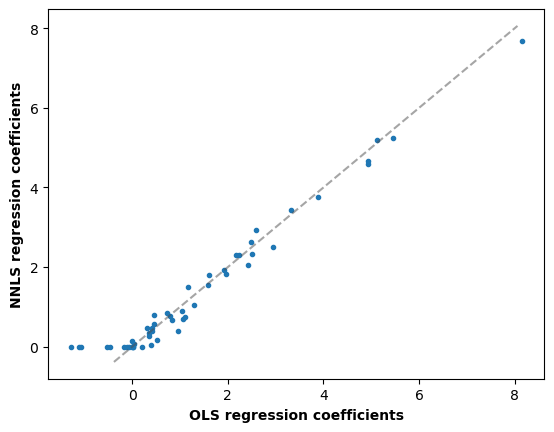

In [4]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

In [5]:
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
# print(X)
true_coef = 3 * np.random.randn(n_features)
# print(true_coef)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
print(true_coef)
y = np.dot(X, true_coef)
# print(y)

y += 5 * np.random.normal(size=(n_samples,))
# np.random.normal(size=(n_samples,))

[1.63916629 2.34058839 1.73403107 0.         1.27381353 0.
 4.60176433 4.59324368 2.66820309 3.73780337 0.         0.
 0.         3.0244128  0.         0.         0.6724143  0.
 0.79431835 0.         0.         2.47248995 0.         0.
 2.8643844  0.         0.55346665 0.         0.         4.58883088
 1.71580731 0.         0.         0.         0.64911446 2.72634999
 0.09551268 0.00738536 0.         3.97213444 0.         0.77592351
 0.76883888 0.         0.         0.         4.14998925 0.
 0.         0.        ]
